In [0]:
import pandas as pd
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import time
from matplotlib.ticker import PercentFormatter
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [0]:
def getdir_pr(n_choices, eps=0.):
    
    pr=np.empty(4)
    
    for i in range(n_choices):
        pr[i]=(1.-eps) / n_choices
    
    rand_n = np.random.randint(0, 1000)
    
    dir_1_th = 1000 * (eps + pr[0])
    dir_2_th = 1000 * (eps + pr[0] + pr[1])
    dir_3_th = 1000 * (eps + pr[0] + pr[1] + pr[2])
    dir_4_th = 1000 * (eps + pr[0] + pr[1] + pr[2] + pr[3])
    
    direction=0 
    if(rand_n < 1000 * eps):
        direction = 0
        probability = eps
        return direction, probability
    elif (rand_n < dir_1_th):
        direction = 1
        probability = pr[0]
        return direction, probability
    elif (rand_n < dir_2_th):
        direction = 2
        probability = pr[1]
        return direction, probability
    elif (rand_n < dir_3_th):
        direction = 3
        probability  = pr[2]
        return direction, probability
    elif (rand_n < dir_4_th):
        direction = 4
        probability = pr[3]
        return direction, probability


## Design1 & 2

In [0]:
def saw_weights(eps=0.):
    """
    Tries to generate a SAW of length n using the myopic algorithm and keeps track of its weight
    
    Returns:
        (x, y, stuck, weights) (list, list, bool, list): 
            (x,y) is a SAW of length <= n
            stuck is 1 if the walk could not terminate
            weights is a list of inverse probabilities 
    """
    x, y = [0], [0] 
    positions = set([(0,0)])
    stuck = 0
    hit_nn=0
    g_x=1
    while not(stuck):
        deltas = [(1,0), (0,1), (-1,0), (0,-1)]
        deltas_feasible = []
        
        for dx, dy in deltas:
            current_x= x[-1] + dx
            current_y= y[-1] + dy
            if (current_x , current_y) not in positions:
                if (current_x<11 and current_x>-1 and current_y<11 and current_y>-1):
                    deltas_feasible.append((dx,dy))
        if deltas_feasible:
            
            #weights.append(1./len(deltas_feasible))  #add inverse probability to weights
            direct, probability = getdir_pr(len(deltas_feasible), eps)
            #print(direct)
            #print(probability)
            if direct==0:
                break
            else:
                dx, dy = deltas_feasible[direct-1]
                positions.add((x[-1] + dx, y[-1] + dy))
                x.append(x[-1] + dx)
                y.append(y[-1] + dy)
                g_x *= probability
        else:
            stuck = 1
            if (x[-1]==10 and y[-1]==10):
                hit_nn+=1
            
    return x, y, len(positions), g_x, hit_nn



In [4]:
#Design1

M= 10**7

n_steps1=np.empty(M)
E1 = np.empty(M)
res1=0
longest_path1=0
weights1=np.empty(M)

for paths in range(1,M):
    x, y, length, g_x, hit_nn = saw_weights(eps=0.)
    if(length>longest_path1):
        longest_path1=length
        longest1_x=x[:]
        longest1_y=y[:]
 
    n_steps1[paths]=length
    res1 += 1./g_x
    E1[paths]=res1/paths
    weights1[paths]=1./g_x
    if(paths % 100000 ==0):
        print (paths)
print(E1[-1])

100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
2000000
2100000
2200000
2300000
2400000
2500000
2600000
2700000
2800000
2900000
3000000
3100000
3200000
3300000
3400000
3500000
3600000
3700000
3800000
3900000
4000000
4100000
4200000
4300000
4400000
4500000
4600000
4700000
4800000
4900000
5000000
5100000
5200000
5300000
5400000
5500000
5600000
5700000
5800000
5900000
6000000
6100000
6200000
6300000
6400000
6500000
6600000
6700000
6800000
6900000
7000000
7100000
7200000
7300000
7400000
7500000
7600000
7700000
7800000
7900000
8000000
8100000
8200000
8300000
8400000
8500000
8600000
8700000
8800000
8900000
9000000
9100000
9200000
9300000
9400000
9500000
9600000
9700000
9800000
9900000
3.463396474564872e+25


In [5]:
#Design2

n_steps2=np.empty(M)
E2 = np.empty(M)
weights2 = np.empty(M)
res2=0
longest_path2=0
for paths in range(1,M):
    x, y, length, g_x, hit_nn = saw_weights(eps=0.1)
    if(length>longest_path2):
        longest_path2=length
        longest2_x=x[:]
        longest2_y=y[:]
    #print(length)
    n_steps2[paths]=length
    res2 +=1./g_x
    E2[paths]=res2/paths
    weights2[paths]=1./g_x
    if(paths % 100000 ==0):
        print (paths)

print(E2[-1])

100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
2000000
2100000
2200000
2300000
2400000
2500000
2600000
2700000
2800000
2900000
3000000
3100000
3200000
3300000
3400000
3500000
3600000
3700000
3800000
3900000
4000000
4100000
4200000
4300000
4400000
4500000
4600000
4700000
4800000
4900000
5000000
5100000
5200000
5300000
5400000
5500000
5600000
5700000
5800000
5900000
6000000
6100000
6200000
6300000
6400000
6500000
6600000
6700000
6800000
6900000
7000000
7100000
7200000
7300000
7400000
7500000
7600000
7700000
7800000
7900000
8000000
8100000
8200000
8300000
8400000
8500000
8600000
8700000
8800000
8900000
9000000
9100000
9200000
9300000
9400000
9500000
9600000
9700000
9800000
9900000
2.047343045934156e+25


In [0]:
# Generate childrens
def gen_child(positions, x, y, g_x, longest_path3):
    step=51
    deltas = [(1,0), (0,1), (-1,0), (0,-1)]
    stuck=0
    hit_nn=0
    
    while not(stuck):
        deltas_feasible = []

        for dx, dy in deltas:
            current_x= x[-1] + dx
            current_y= y[-1] + dy
            if (current_x , current_y) not in positions:
                if (current_x<11 and current_x>-1 and current_y<11 and current_y>-1):
                    deltas_feasible.append((dx,dy))
        if deltas_feasible:
            direct, probability = getdir_pr(len(deltas_feasible))
           
            dx, dy = deltas_feasible[direct-1]
            positions.add((x[-1] + dx, y[-1] + dy))
            x.append(x[-1] + dx)
            y.append(y[-1] + dy)
            step+=1
            g_x *= probability

        else:
            stuck = 1
            if (x[-1]==10 and y[-1]==10):
                hit_nn+=1
    longest3_x=[]
    longest3_y=[]
    n_steps3=step
    if(len(positions)>longest_path3):
        longest_path3=len(positions)
        longest3_x=x[:]
        longest3_y=y[:]
    return g_x, longest_path3
    

In [7]:
#Design3

M=10**7
    
path=0

wt_sum=0.

E3 = np.empty(M)
n_steps3=np.empty(M)
weights3 = np.empty(M)

deltas = [(1,0), (0,1), (-1,0), (0,-1)]

longest_path3=0
longest3_x=[]
longest3_y=[]

while (path<M+1):
    x, y = [0], [0] 
    g_x=1
    positions = set([(0,0)])
    stuck = 0
    hit_nn=0   
    
    step=0 
    
    while not(stuck):
        deltas_feasible = []

        # gather all feasible directions at each step
        for dx, dy in deltas:
            current_x= x[-1] + dx
            current_y= y[-1] + dy
            if (current_x , current_y) not in positions:
                if (current_x<11 and current_x>-1 and current_y<11 and current_y>-1):
                    deltas_feasible.append((dx,dy))

        if deltas_feasible:         
            direct, probability = getdir_pr(len(deltas_feasible))

            dx, dy = deltas_feasible[direct-1]
            positions.add((x[-1] + dx, y[-1] + dy))
            x.append(x[-1] + dx)
            y.append(y[-1] + dy)                
            step+=1
            g_x *= probability

            if step>50:
                child=0
                while(child<5):
                    child+=1
                    g_temp, length = gen_child(positions, x, y, g_x, longest_path3)
                    #print(g_temp)
                    wt_sum += 1./g_temp/5.
                    path+=1
                    step=0
                    if(path>M):
                        break
                    E3[path-1]= wt_sum/path
                    n_steps3[path-1]=length
                    weights3[path-1]=1./g_temp/5.
                    if(length>longest_path3):
                        longest_path3=length
                        longest3_x=x[:]
                        longest3_y=y[:]
                break          

               
        else:
            stuck = 1
            if (x[-1]==10 and y[-1]==10):
                hit_nn+=1

    if(step>longest_path3):
        longest_path3=step
        longest3_x=x[:]
        longest3_y=y[:]
    
    path+=1
    if(path>M):
        break 
    wt_sum+=1./g_x
    E3[path-1]= wt_sum/path
    weights3[path-1]=1./g_x
    n_steps3[path-1]=step
    #print(E3[0])
    
    
    
    if(path % 100000 ==0):
        print (path)

       
print(E3[-1])

100000
400000
500000
600000
900000
1100000
1200000
1400000
1700000
1800000
1900000
2000000
2200000
2300000
2400000
2500000
2600000
2800000
2900000
3100000
3200000
3300000
3400000
3500000
3600000
3800000
4000000
4100000
4200000
4500000
4600000
4700000
4900000
5000000
5200000
5500000
5600000
5700000
5900000
6000000
6100000
6200000
6300000
6500000
6700000
6800000
6900000
7200000
7700000
7900000
8000000
8100000
8200000
8400000
8600000
8700000
8800000
8900000
9600000
9800000
10000000
3.539262040090557e+24


In [0]:
n_steps3

array([21.,  5., 42., ..., 43., 16.,  5.])

In [0]:
weights3

array([1.49299200e+06, 7.20000000e+01, 2.03119913e+14, ...,
       2.77639532e+16, 6.22080000e+04, 7.20000000e+01])

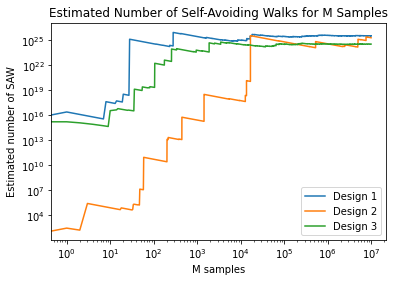

In [8]:
fig = plt.figure()
plt.plot(E1)
plt.plot(E2)
plt.plot(E3[1:])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('M samples')
plt.ylabel('Estimated number of SAW')
plt.title('Estimated Number of Self-Avoiding Walks for M Samples')
plt.legend(['Design 1', 'Design 2', 'Design 3'])
fig.savefig('2a.png', dpi=300)
plt.show()

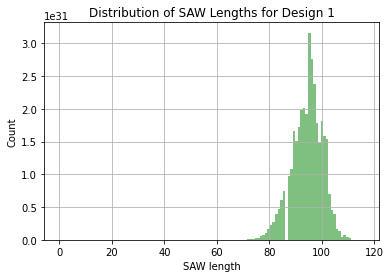

In [9]:
fig = plt.figure()
plt.hist(n_steps1, bins=120, weights=weights1, alpha=0.5, label='Design 1', color='green')
#plt.hist(n_steps2[1:], bins=120, weights=weights2[1:], alpha=0.5, label='Design 2', color='blue')
#plt.hist(n_steps3, bins=120, weights=weights3, alpha=0.5, label='Design 3', color='red')
plt.grid()
plt.xlabel('SAW length')
plt.ylabel('Count')
plt.title('Distribution of SAW Lengths for Design 1')
#plt.legend('Design 1')
fig.savefig('2c_histogram1.png', dpi=300)
plt.show()


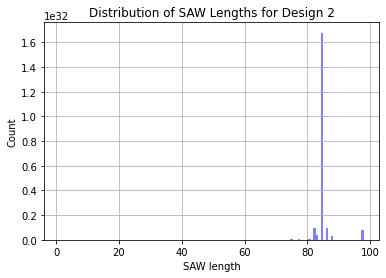

In [10]:
fig = plt.figure()
#plt.hist(n_steps1, bins=120, weights=weights1, alpha=0.5, label='Design 1', color='green')
plt.hist(n_steps2[1:], bins=120, weights=weights2[1:], alpha=0.5, label='Design 2', color='blue')
#plt.hist(n_steps3, bins=120, weights=weights3, alpha=0.5, label='Design 3', color='red')
plt.grid()
plt.xlabel('SAW length')
plt.ylabel('Count')
plt.title('Distribution of SAW Lengths for Design 2')
#plt.legend('Design 2')
fig.savefig('2c_histogram2.png', dpi=300)
plt.show()

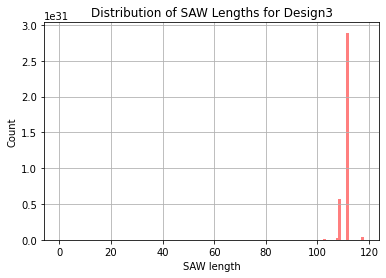

In [11]:
fig = plt.figure()
#plt.hist(n_steps1, bins=120, weights=weights1, alpha=0.5, label='Design 1', color='green')
#plt.hist(n_steps2[1:], bins=120, weights=weights2[1:], alpha=0.5, label='Design 2', color='blue')
plt.hist(n_steps3[1:], bins=120,  weights=weights3[1:], alpha=0.5, label='Design 3', color='red')
plt.grid()
plt.xlabel('SAW length')
plt.ylabel('Count')
plt.title('Distribution of SAW Lengths for Design3')
#plt.legend('Design 3')
fig.savefig('2c_histogram3.png', dpi=300)
plt.show()

## Hit (n,n)

In [0]:
M=10**6
    
path=0

wt_sum=0.

E1_nn = np.empty(M)

deltas = [(1,0), (0,1), (-1,0), (0,-1)]


while (path<M):
   
    x, y = [0], [0] 
    positions = set([(0,0)])
    stuck = 0
    attempts=1
    g_x=1.
    
    while not(stuck):
            
        deltas = [(1,0), (0,1), (-1,0), (0,-1)]
        deltas_feasible = []
        
        for dx, dy in deltas:
            current_x= x[-1] + dx
            current_y= y[-1] + dy
            if (current_x , current_y) not in positions:
                if (current_x<11 and current_x>-1 and current_y<11 and current_y>-1):
                    deltas_feasible.append((dx,dy))
        if deltas_feasible:
            
            direct, probability = getdir_pr(len(deltas_feasible))

            dx, dy = deltas_feasible[direct-1]
            positions.add((x[-1] + dx, y[-1] + dy))
            x.append(x[-1] + dx)
            y.append(y[-1] + dy)
            g_x *= probability 
            
            if (x[-1]==10 and y[-1]==10):
                path+=1
                if(path>=M):
                    break
                wt_sum+=1./g_x/attempts
                E1_nn[path]= wt_sum/path
                break
        else:
            stuck=1
            attempts+=1
    


In [0]:
E1_nn[-1]

1.5787835001893968e+25

## Longest path 1

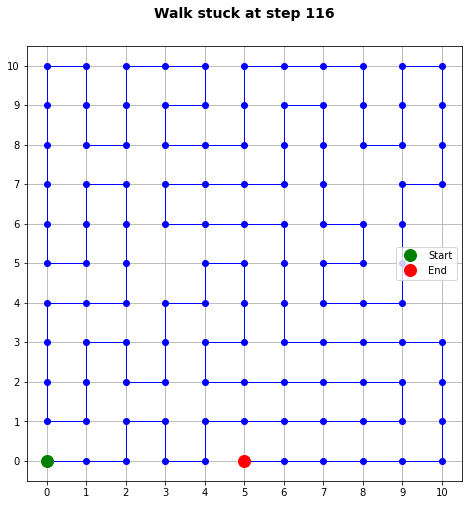

In [12]:
#x, y, stuck, steps = saw_weights()

fig= plt.figure(figsize=(8,8))

ax = fig.gca()
ax.set_xlim(-0.5, 10.5)
ax.set_ylim(-0.5, 10.5)
ax.set_aspect('equal', adjustable='box')

ax.set_xticks(np.arange(0, 11, 1))
ax.set_yticks(np.arange(0, 11, 1))
plt.plot(longest1_x, longest1_y, 'bo-', linewidth = 1)
plt.plot(0, 0, 'go', ms = 12, label = 'Start')
plt.plot(longest1_x[-1], longest1_y[-1], 'ro', ms = 12, label = 'End')
#plt.axis('equal')
plt.legend()
plt.grid()

plt.title('Walk stuck at step ' + str(longest_path1), fontsize=14, fontweight='bold', y = 1.05)

fig.savefig('3_longest1.png', dpi=300)

plt.show()

## Longest path 2

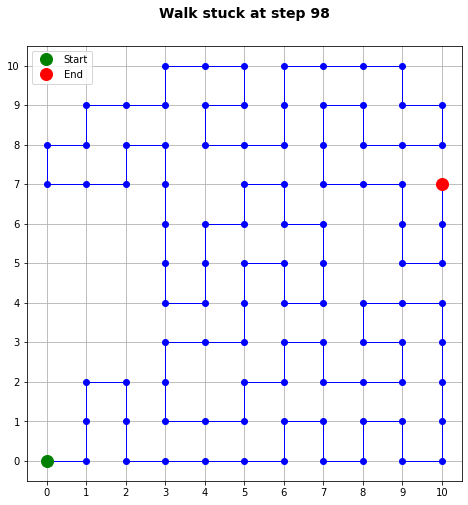

In [13]:
#x, y, stuck, steps = saw_weights()

fig= plt.figure(figsize=(8,8))

ax = fig.gca()
ax.set_xlim(-0.5, 10.5)
ax.set_ylim(-0.5, 10.5)
ax.set_aspect('equal', adjustable='box')

ax.set_xticks(np.arange(0, 11, 1))
ax.set_yticks(np.arange(0, 11, 1))
plt.plot(longest2_x, longest2_y, 'bo-', linewidth = 1)
plt.plot(0, 0, 'go', ms = 12, label = 'Start')
plt.plot(longest2_x[-1], longest2_y[-1], 'ro', ms = 12, label = 'End')
#plt.axis('equal')
plt.legend()
plt.grid()

plt.title('Walk stuck at step ' + str(longest_path2), fontsize=14, fontweight='bold', y = 1.05)

fig.savefig('3_longest2.png', dpi=300)


plt.show()

## Longest path3

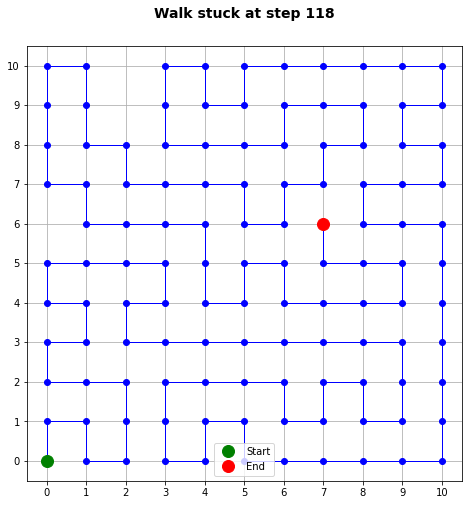

In [14]:

#x, y, stuck, steps = saw_weights()

fig= plt.figure(figsize=(8,8))
#plt.axis([0, 11, 0, 11])

ax = fig.gca()
ax.set_xlim(-0.5, 10.5)
ax.set_ylim(-0.5, 10.5)
ax.set_aspect('equal', adjustable='box')

ax.set_xticks(np.arange(0, 11, 1))
ax.set_yticks(np.arange(0, 11, 1))
plt.plot(longest3_x, longest3_y, 'bo-', linewidth = 1)
plt.plot(0, 0, 'go', ms = 12, label = 'Start')
plt.plot(longest3_x[-1], longest3_y[-1], 'ro', ms = 12, label = 'End')
#plt.axis('equal')
plt.legend()
plt.grid()

plt.title('Walk stuck at step ' + str(longest_path3), fontsize=14, fontweight='bold', y = 1.05)

fig.savefig('3_longest3.png', dpi=300)

plt.show()
